# Data preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pickle
np.random.seed(42)

Basic data analysis

Dataset Information:
--------------------------------------------------

Dataset Shape: (768, 5)

Columns: ['Glucose', 'Insulin', 'BMI', 'Age', 'Outcome']

First few rows of the dataset:
--------------------------------------------------
   Glucose  Insulin   BMI  Age  Outcome
0      148        0  33.6   50        1
1       85        0  26.6   31        0
2      183        0  23.3   32        1
3       89       94  28.1   21        0
4      137      168  43.1   33        1

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   Insulin  768 non-null    int64  
 2   BMI      768 non-null    float64
 3   Age      768 non-null    int64  
 4   Outcome  768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB
None

Statistical Summary:
--------

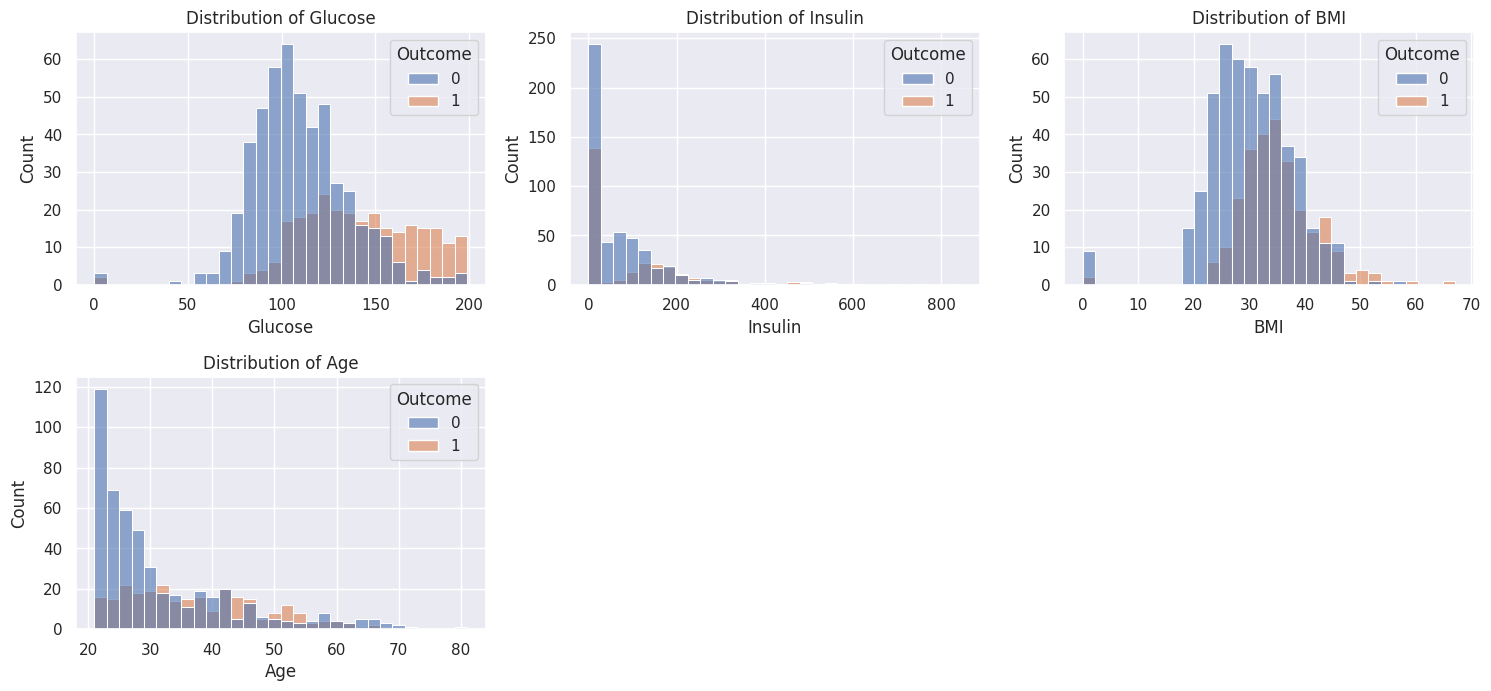

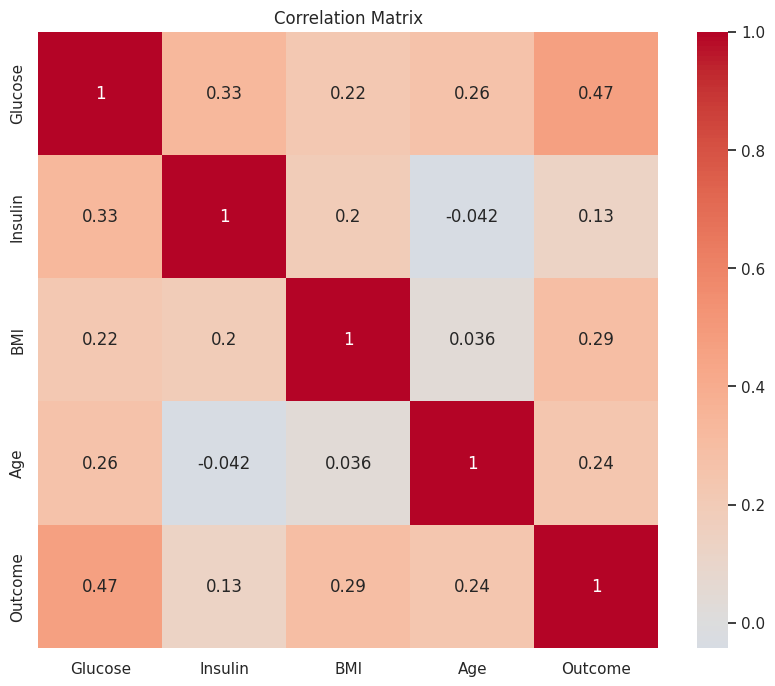

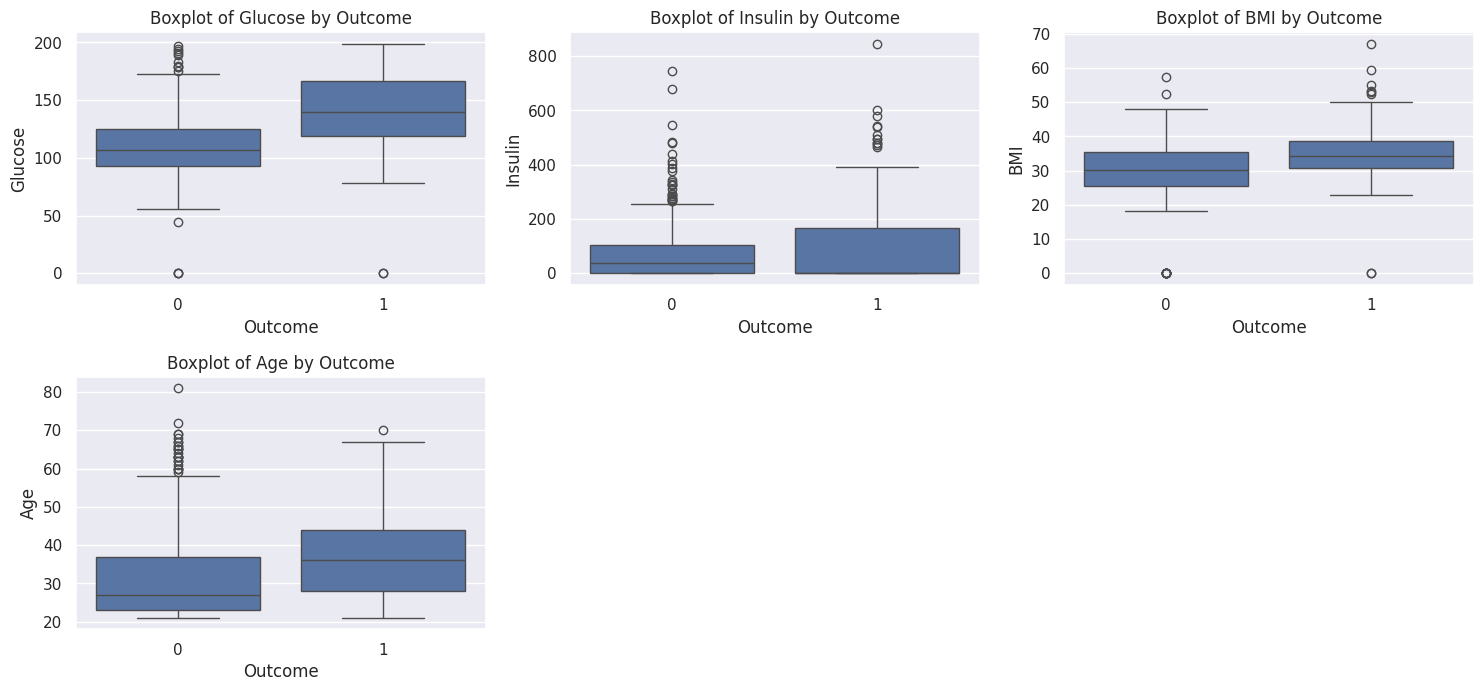

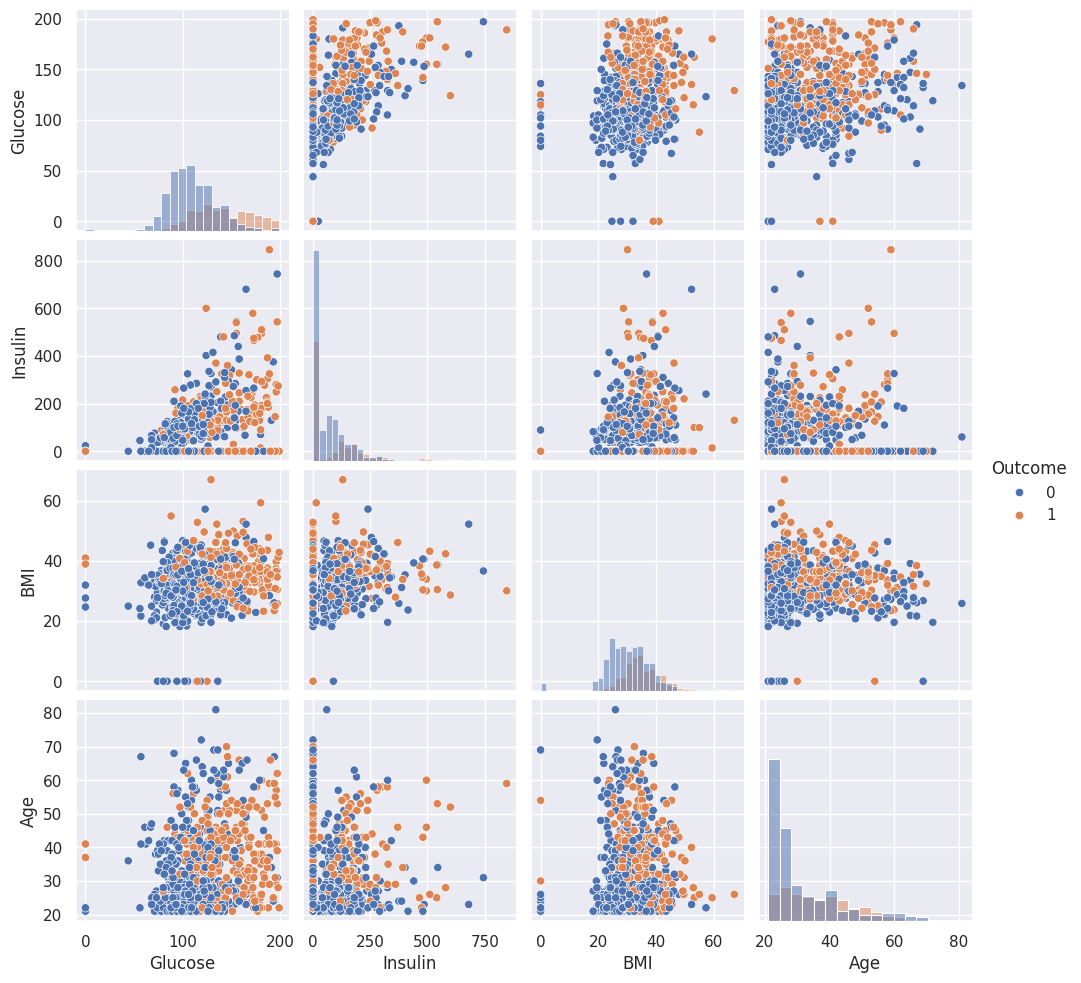

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

def perform_basic_analysis(df):
    """Perform basic analysis of the dataset"""

    # Basic information about the dataset
    print("Dataset Information:")
    print("-" * 50)
    print("\nDataset Shape:", df.shape)
    print("\nColumns:", list(df.columns))

    # Display the first few rows
    print("\nFirst few rows of the dataset:")
    print("-" * 50)
    print(df.head())

    # Data types and missing values
    print("\nDataset Info:")
    print("-" * 50)
    print(df.info())

    # Statistical summary
    print("\nStatistical Summary:")
    print("-" * 50)
    print(df.describe().round(2))

    # Check for missing values
    print("\nMissing Values:")
    print("-" * 50)
    print(df.isnull().sum())

    # Distribution of target variable
    print("\nTarget Variable Distribution:")
    print("-" * 50)
    print(df['Outcome'].value_counts(normalize=True).round(3) * 100)

def create_visualizations(df):
    """Create various visualizations for the dataset"""

    # Set up the style
    sns.set_theme(style="darkgrid")

    # 1. Distribution plots for all features
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns[:-1], 1):
        plt.subplot(3, 3, i)
        sns.histplot(data=df, x=column, hue='Outcome', bins=30, alpha=0.6)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()

    # 2. Correlation matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')

    # 3. Box plots for outlier detection
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(df.columns[:-1], 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, y=column, x='Outcome')
        plt.title(f'Boxplot of {column} by Outcome')
    plt.tight_layout()

    # 4. Pair plot for key features
    sns.pairplot(df, hue='Outcome', diag_kind='hist')

def analyze_relationships(df):
    """Analyze relationships between features and target"""

    # Calculate statistical tests and effect sizes
    print("\nFeature-Target Relationships:")
    print("-" * 50)

    for column in df.columns[:-1]:
        # Separate data by outcome
        diabetic = df[df['Outcome'] == 1][column]
        non_diabetic = df[df['Outcome'] == 0][column]

        # Perform t-test
        t_stat, p_value = stats.ttest_ind(diabetic, non_diabetic)

        # Calculate Cohen's d effect size
        pooled_std = np.sqrt(((diabetic.std()**2 + non_diabetic.std()**2)) / 2)
        cohens_d = abs(diabetic.mean() - non_diabetic.mean()) / pooled_std

        print(f"\n{column}:")
        print(f"Mean (Diabetic): {diabetic.mean():.2f}")
        print(f"Mean (Non-Diabetic): {non_diabetic.mean():.2f}")
        print(f"T-statistic: {t_stat:.2f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Effect size (Cohen's d): {cohens_d:.2f}")

def identify_outliers(df):
    """Identify outliers in the dataset"""

    print("\nOutlier Analysis:")
    print("-" * 50)

    for column in df.columns[:-1]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

        print(f"\n{column}:")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers)/len(df)*100):.2f}%")
        print(f"Range of outliers: [{outliers.min():.2f}, {outliers.max():.2f}]")

# Perform all analyses
perform_basic_analysis(df)
create_visualizations(df)
analyze_relationships(df)
identify_outliers(df)

Scaling

In [ ]:
# Import previous libraries if not already imported
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    train_size=0.8,
    random_state=42
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify scaling results
print("Before scaling - First few rows statistics:")
print(X_train.describe().iloc[1:3])  # mean and std rows

print("\nAfter scaling - First few rows statistics:")
print(X_train_scaled.describe().iloc[1:3])  # mean and std rows

Before scaling - First few rows statistics:
         Glucose     Insulin        BMI        Age
mean  120.855049   81.438111  31.983388  32.907166
std    32.035057  116.234835   7.740625  11.503437

After scaling - First few rows statistics:
           Glucose       Insulin           BMI           Age
mean -2.169817e-17 -2.603780e-17 -5.699386e-16 -3.761016e-17
std   1.000815e+00  1.000815e+00  1.000815e+00  1.000815e+00


# Naive Bayes Model

In [ ]:
# Import required libraries if not already imported
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_nb = naive_bayes_model.predict(X_test_scaled)

# Calculate prediction probabilities
y_pred_proba = naive_bayes_model.predict_proba(X_test_scaled)

# Evaluate the model
print("Naive Bayes Model Evaluation:")
print("-" * 30)

# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_nb):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


# Example of how to make predictions for new data
# Assuming 'new_data' is scaled using the same scaler
print("\nExample prediction probabilities for first 5 test samples:")
for i, (pred, proba) in enumerate(zip(y_pred_nb[:5], y_pred_proba[:5])):
    print(f"Sample {i+1}: Prediction = {pred}, Probability = {proba}")

Naive Bayes Model Evaluation:
------------------------------
Accuracy Score: 0.7468

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
[[80 19]
 [20 35]]

Example prediction probabilities for first 5 test samples:
Sample 1: Prediction = 0, Probability = [0.68626214 0.31373786]
Sample 2: Prediction = 0, Probability = [0.8769623 0.1230377]
Sample 3: Prediction = 0, Probability = [0.92647368 0.07352632]
Sample 4: Prediction = 0, Probability = [0.92308641 0.07691359]
Sample 5: Prediction = 0, Probability = [0.50680507 0.49319493]


# Perceptron Model

Sklearn Perceptron

In [ ]:
# Import required libraries if not already imported
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# Initialize the Perceptron model with specified parameters
perceptron_model = Perceptron(
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

# Train the model
perceptron_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_perceptron = perceptron_model.predict(X_test_scaled)

# Calculate prediction scores (distance from decision boundary)
decision_scores = perceptron_model.decision_function(X_test_scaled)

# Evaluate the model
print("Perceptron Model Evaluation:")
print("-" * 30)

# Accuracy score
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_perceptron):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_perceptron))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_perceptron))

# Training information
print("\nTraining Information:")
print(f"Number of iterations needed: {perceptron_model.n_iter_}")
print(f"Number of weight updates: {perceptron_model.t_}")

# Save the trained model (optional)
with open('perceptron_model.pkl', 'wb') as file:
    pickle.dump(perceptron_model, file)

# Compare predictions with Naive Bayes
print("\nComparison with Naive Bayes:")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Perceptron Accuracy: {accuracy_score(y_test, y_pred_perceptron):.4f}")

# Example predictions for first few samples
print("\nExample predictions for first 5 test samples:")
for i, (true, pred, score) in enumerate(zip(y_test[:5], y_pred_perceptron[:5], decision_scores[:5])):
    print(f"Sample {i+1}: True = {true}, Predicted = {pred}, Decision Score = {score:.4f}")

Perceptron Model Evaluation:
------------------------------
Accuracy Score: 0.6364

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        99
           1       0.49      0.49      0.49        55

    accuracy                           0.64       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.64      0.64      0.64       154


Confusion Matrix:
[[71 28]
 [28 27]]

Training Information:
Number of iterations needed: 16
Number of weight updates: 9825.0

Comparison with Naive Bayes:
Naive Bayes Accuracy: 0.7468
Perceptron Accuracy: 0.6364

Example predictions for first 5 test samples:
Sample 1: True = 0, Predicted = 0, Decision Score = -6.2698
Sample 2: True = 0, Predicted = 0, Decision Score = -1.7555
Sample 3: True = 0, Predicted = 0, Decision Score = -1.5409
Sample 4: True = 0, Predicted = 1, Decision Score = 0.6774
Sample 5: True = 0, Predicted = 1, Decision Score = 4.2566


Custom perceptron implementation

Custom Perceptron Model Evaluation:
------------------------------
Accuracy Score: 0.7273

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154


Confusion Matrix:
[[81 18]
 [24 31]]

Comparison with sklearn Perceptron:
Custom Perceptron Accuracy: 0.7273
Sklearn Perceptron Accuracy: 0.6364


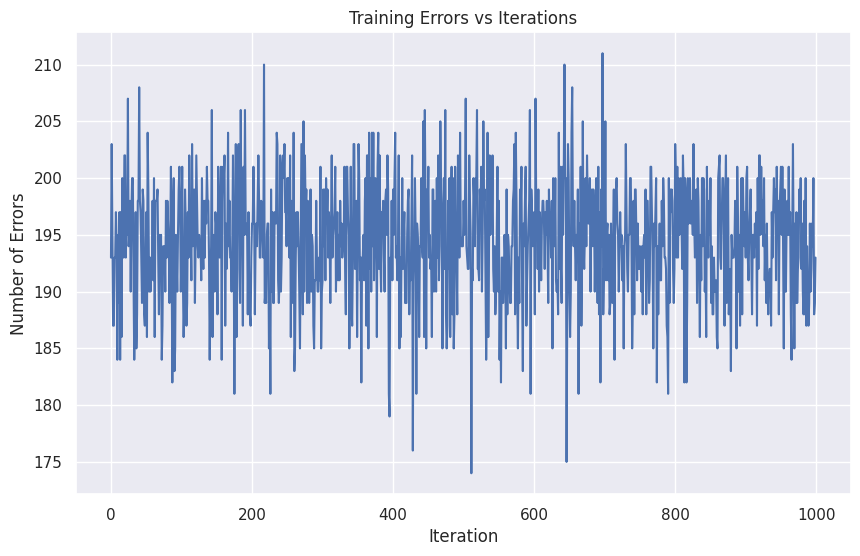

In [ ]:
import numpy as np
from typing import Tuple

class CustomPerceptron:
    def __init__(self, learning_rate: float = 0.01, n_iterations: int = 1000):
        """
        Args:
            learning_rate (float): How much to update weights on each step (default: 0.01)
            n_iterations (int): Maximum number of passes over the training data (default: 1000)
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.training_errors = []

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'CustomPerceptron':
        """
        Train the perceptron on the given data

        Args:
            X (np.ndarray): Training features of shape (n_samples, n_features)
            y (np.ndarray): Target values of shape (n_samples,)

        Returns:
            self: Trained perceptron instance
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Ensure y is in {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        # Training loop
        for _ in range(self.n_iterations):
            errors = 0

            # Iterate over each training sample
            for idx, x_i in enumerate(X):
                # Calculate linear output
                linear_output = np.dot(x_i, self.weights) + self.bias

                # Predict using sign function
                y_predicted = np.sign(linear_output)

                # Update weights and bias if prediction is wrong
                if y_predicted != y_[idx]:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]
                    errors += 1

            # Store number of errors for this iteration
            self.training_errors.append(errors)

            # Early stopping if no errors were made
            if errors == 0:
                break

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Make predictions for given features

        Args:
            X (np.ndarray): Features to predict of shape (n_samples, n_features)

        Returns:
            np.ndarray: Predicted classes {0, 1}
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        # Convert predictions back to {0, 1}
        return np.where(y_predicted <= 0, 0, 1)

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Calculate accuracy score

        Args:
            X (np.ndarray): Test features
            y (np.ndarray): True labels

        Returns:
            float: Accuracy score between 0 and 1
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

# Test the custom perceptron on the diabetes dataset
if __name__ == "__main__":
    # Initialize the custom perceptron
    custom_perceptron = CustomPerceptron(learning_rate=0.01, n_iterations=1000)

    # Cast X_train_scaled and X_test_scaled to numeric type
    X_train_scaled_numeric = X_train_scaled.astype(float).values  # Cast to float and get NumPy array
    X_test_scaled_numeric = X_test_scaled.astype(float).values  # Cast to float and get NumPy array


    # Train the model using the numeric data
    custom_perceptron.fit(X_train_scaled_numeric, y_train)  # Using numeric data

    # Make predictions using the numeric data
    y_pred_custom = custom_perceptron.predict(X_test_scaled_numeric)

    # Evaluate the model
    print("Custom Perceptron Model Evaluation:")
    print("-" * 30)
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred_custom):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_custom))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred_custom))

    # Plot training errors over iterations
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(custom_perceptron.training_errors)
    plt.title('Training Errors vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Number of Errors')
    plt.grid(True)

    # Compare with sklearn Perceptron
    print("\nComparison with sklearn Perceptron:")
    print(f"Custom Perceptron Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
    print(f"Sklearn Perceptron Accuracy: {accuracy_score(y_test, y_pred_perceptron):.4f}")

# Comparison and performance analysis

Model Performance Metrics:
--------------------------------------------------
           Naive Bayes  Perceptron
accuracy        0.7468      0.6364
precision       0.6481      0.4909
recall          0.6364      0.4909
f1              0.6422      0.4909

Model Analysis:
--------------------------------------------------

Naive Bayes Strengths:
1. Performs well with small training sets
2. Handles missing values well
3. Fast training and prediction times
4. Works well with high-dimensional data

Naive Bayes Limitations:
1. Assumes feature independence (naive assumption)
2. Sensitive to feature scaling
3. May struggle with highly correlated features

Perceptron Strengths:
1. Simple and interpretable model
2. Works well for linearly separable data
3. Online learning capability
4. Memory efficient

Perceptron Limitations:
1. Only works for linearly separable data
2. Sensitive to feature scaling
3. Sensitive to noisy data
4. Order of training data can affect performance

Performance Summary:


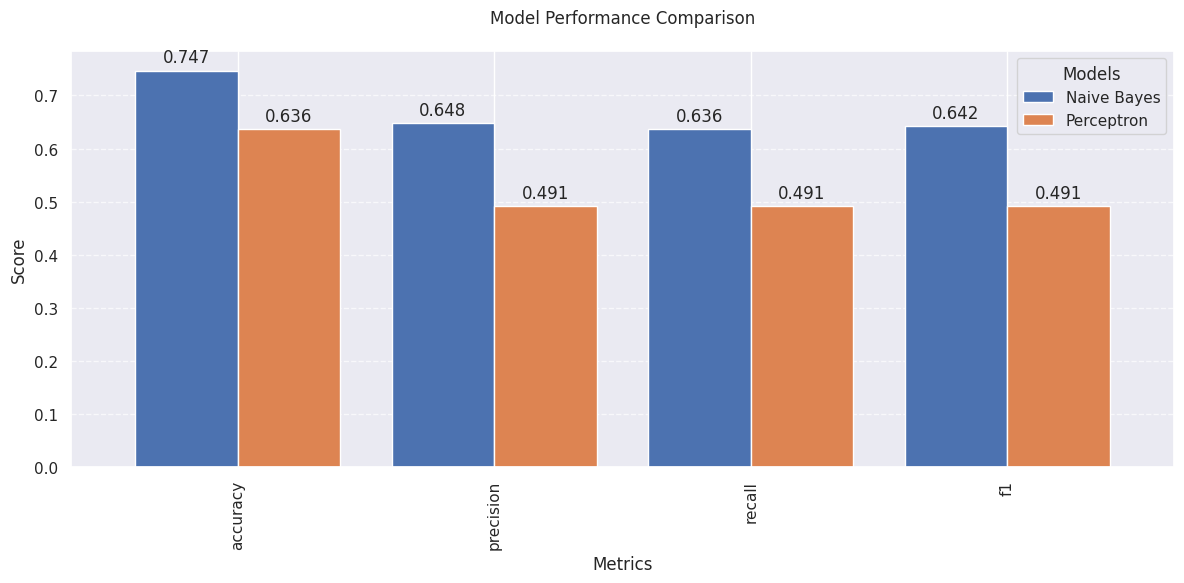

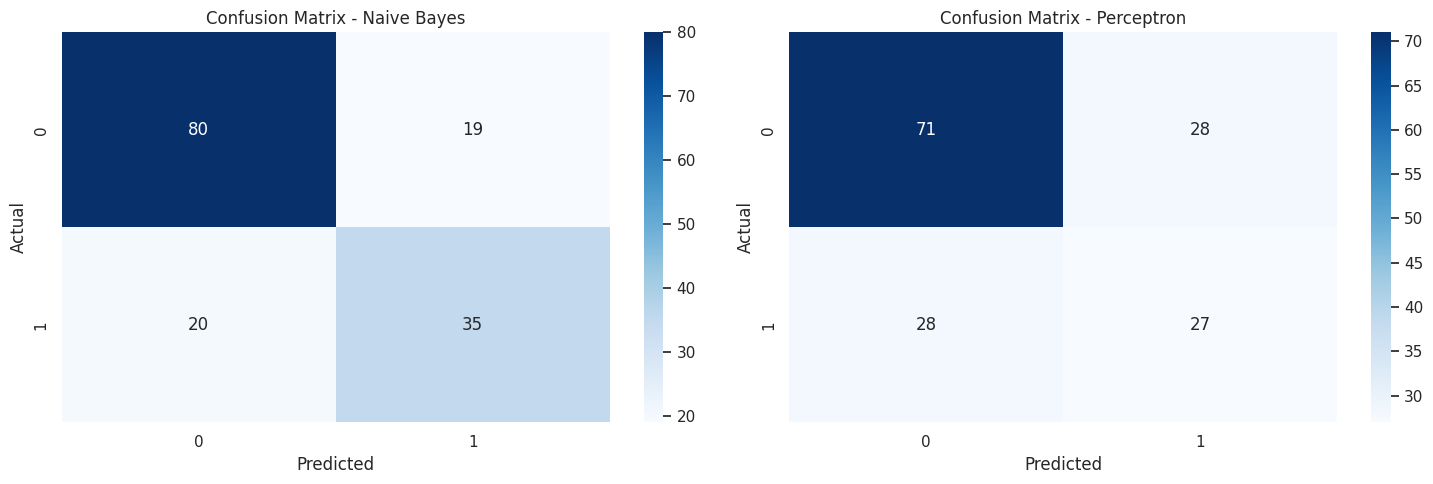

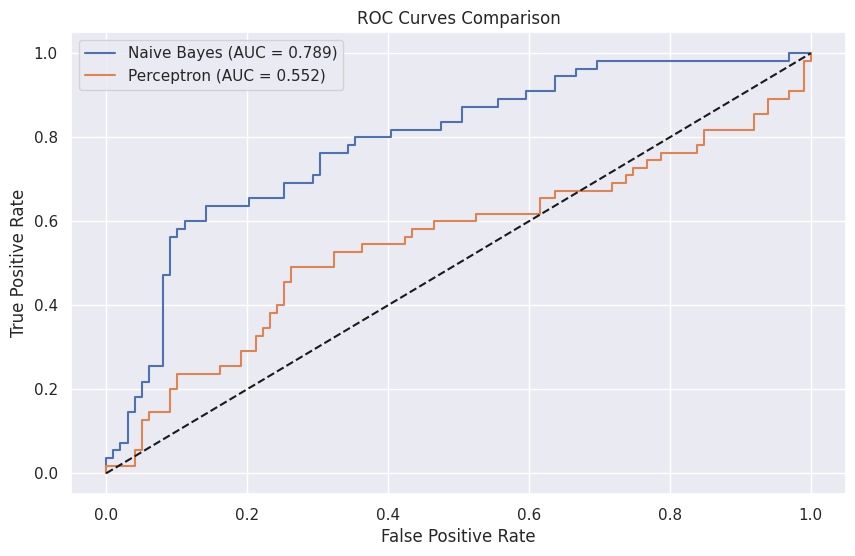

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def create_comparison_metrics():
    # Calculate all metrics for both models
    metrics = {
        'Naive Bayes': {
            'accuracy': accuracy_score(y_test, y_pred_nb),
            'precision': precision_score(y_test, y_pred_nb),
            'recall': recall_score(y_test, y_pred_nb),
            'f1': f1_score(y_test, y_pred_nb)
        },
        'Perceptron': {
            'accuracy': accuracy_score(y_test, y_pred_perceptron),
            'precision': precision_score(y_test, y_pred_perceptron),
            'recall': recall_score(y_test, y_pred_perceptron),
            'f1': f1_score(y_test, y_pred_perceptron)
        }
    }

    # Create comparison DataFrame
    df_comparison = pd.DataFrame(metrics).round(4)
    return df_comparison

def plot_comparison_metrics(df_comparison):
    # Set up the plot style
    sns.set_theme(style="darkgrid")

    # Create bar plot
    ax = df_comparison.plot(kind='bar', figsize=(12, 6), width=0.8)
    plt.title('Model Performance Comparison', pad=20)
    plt.xlabel('Metrics')
    plt.ylabel('Score')

    # Add value labels on the bars
    for i in ax.containers:
        ax.bar_label(i, fmt='%.3f', padding=3)

    plt.legend(title='Models')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

def plot_confusion_matrices():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Confusion matrix for Naive Bayes
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix - Naive Bayes')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')

    # Confusion matrix for Perceptron
    cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
    sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_title('Confusion Matrix - Perceptron')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')

    plt.tight_layout()

def plot_roc_curves():
    # Calculate ROC curve for Naive Bayes
    nb_proba = naive_bayes_model.predict_proba(X_test_scaled)[:, 1]
    fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_proba)
    roc_auc_nb = auc(fpr_nb, tpr_nb)

    # Calculate ROC curve for Perceptron
    perceptron_scores = perceptron_model.decision_function(X_test_scaled)
    fpr_perc, tpr_perc, _ = roc_curve(y_test, perceptron_scores)
    roc_auc_perc = auc(fpr_perc, tpr_perc)

    # Plot ROC curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.3f})')
    plt.plot(fpr_perc, tpr_perc, label=f'Perceptron (AUC = {roc_auc_perc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend()
    plt.grid(True)

# Generate and display all comparisons
df_comparison = create_comparison_metrics()
print("Model Performance Metrics:")
print("-" * 50)
print(df_comparison)

# Create all plots
plot_comparison_metrics(df_comparison)
plot_confusion_matrices()
plot_roc_curves()

# Analyze model strengths and weaknesses
print("\nModel Analysis:")
print("-" * 50)
print("\nNaive Bayes Strengths:")
print("1. Performs well with small training sets")
print("2. Handles missing values well")
print("3. Fast training and prediction times")
print("4. Works well with high-dimensional data")

print("\nNaive Bayes Limitations:")
print("1. Assumes feature independence (naive assumption)")
print("2. Sensitive to feature scaling")
print("3. May struggle with highly correlated features")

print("\nPerceptron Strengths:")
print("1. Simple and interpretable model")
print("2. Works well for linearly separable data")
print("3. Online learning capability")
print("4. Memory efficient")

print("\nPerceptron Limitations:")
print("1. Only works for linearly separable data")
print("2. Sensitive to feature scaling")
print("3. Sensitive to noisy data")
print("4. Order of training data can affect performance")

# Performance Summary
print("\nPerformance Summary:")
print("-" * 50)
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    better_model = 'Naive Bayes' if df_comparison.loc[metric, 'Naive Bayes'] > df_comparison.loc[metric, 'Perceptron'] else 'Perceptron'
    difference = abs(df_comparison.loc[metric, 'Naive Bayes'] - df_comparison.loc[metric, 'Perceptron'])
    print(f"{metric.capitalize()}: {better_model} performs better by {difference:.4f}")

K-fold cross validation

In [ ]:
# Import required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Load and preprocess data
# (assuming previous code for loading and scaling the data)

# K-Fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Naive Bayes
print("Naive Bayes Model Evaluation (K-Fold CV):")
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=kf)
print(f"Accuracy Scores: {nb_scores}")
print(f"Mean Accuracy: {np.mean(nb_scores):.4f} +/- {np.std(nb_scores):.4f}")

# Perceptron
print("\nPerceptron Model Evaluation (K-Fold CV):")
p_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
p_scores = cross_val_score(p_model, X_train_scaled, y_train, cv=kf)
print(f"Accuracy Scores: {p_scores}")
print(f"Mean Accuracy: {np.mean(p_scores):.4f} +/- {np.std(p_scores):.4f}")

Naive Bayes Model Evaluation (K-Fold CV):
Accuracy Scores: [0.77235772 0.75609756 0.73170732 0.72357724 0.74590164]
Mean Accuracy: 0.7459 +/- 0.0173

Perceptron Model Evaluation (K-Fold CV):
Accuracy Scores: [0.72357724 0.69918699 0.69105691 0.68292683 0.71311475]
Mean Accuracy: 0.7020 +/- 0.0147


# Flask

In [ ]:
import pickle

# Saving the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as nb_file:
    pickle.dump(naive_bayes_model, nb_file)
print("Naive Bayes model saved as naive_bayes_model.pkl")

# Saving the Perceptron model
with open('perceptron_model.pkl', 'wb') as perc_file:
    pickle.dump(perceptron_model, perc_file)
print("Perceptron model saved as perceptron_model.pkl")


Naive Bayes model saved as naive_bayes_model.pkl
Perceptron model saved as perceptron_model.pkl


In [ ]:
from flask import Flask, request, jsonify, render_template
from flask_cors import CORS
import pickle
import numpy as np

# Initialize the Flask app
app = Flask(__name__)
CORS(app)  # Enable CORS

# Load the trained models
with open('naive_bayes_model.pkl', 'rb') as nb_file:
    naive_bayes_model = pickle.load(nb_file)

with open('perceptron_model.pkl', 'rb') as perc_file:
    perceptron_model = pickle.load(perc_file)

# Prediction function that allows model selection
def ValuePredictor(to_predict_list, model_type='naive_bayes'):
    # Convert input to the required format
    to_predict = np.array(to_predict_list).reshape(1, 4)

    # Select the model based on the model_type argument
    if model_type == 'naive_bayes':
        model = naive_bayes_model
    elif model_type == 'perceptron':
        model = perceptron_model
    else:
        raise ValueError("Invalid model type. Choose 'naive_bayes' or 'perceptron'.")

    # Perform prediction
    result = model.predict(to_predict)
    return result[0]

@app.route("/", methods=["GET"])
def home():
    return render_template("main.html", prediction="")

# Define the endpoint that accepts form data and returns a result page
@app.route('/result', methods=['POST'])
def result():
    if request.method == 'POST':
        # Get data from the form
        to_predict_list = request.form.to_dict()
        model_type = to_predict_list.pop('model', 'naive_bayes')  # Default to Naive Bayes if not provided

        # Convert input values to integers
        to_predict_list = list(map(int, to_predict_list.values()))

        # Predict using the selected model
        result = ValuePredictor(to_predict_list, model_type=model_type)

        # Interpret the prediction result
        if int(result) == 1:
            prediction = 'Diabetes likely'
        else:
            prediction = 'Diabetes unlikely'

        # Return result to a template
        return render_template("main.html", prediction=prediction)

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)